In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[1]

0

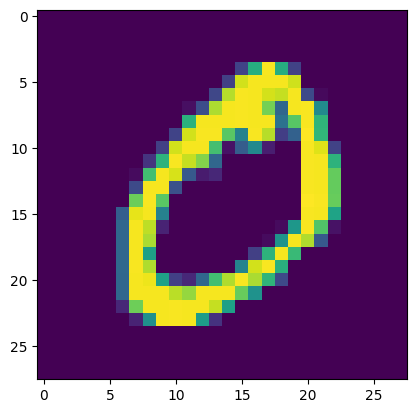

In [6]:
plt.imshow(X_train[1])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 225s 120ms/step - loss: 0.2615 - accuracy: 0.9493 - val_loss: 0.0966 - val_accuracy: 0.9728
Epoch 2/5
1875/1875 [==============================] - 234s 125ms/step - loss: 0.0726 - accuracy: 0.9781 - val_loss: 0.0907 - val_accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 237s 126ms/step - loss: 0.0493 - accuracy: 0.9849 - val_loss: 0.0786 - val_accuracy: 0.9772
Epoch 4/5
1875/1875 [==============================] - 237s 126ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.1077 - val_accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 237s 126ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0851 - val_accuracy: 0.9806


In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.08509685099124908, 0.9805999994277954]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 110ms/step
[[3.12886354e-13 4.91472127e-16 9.55413881e-09 3.05118387e-12
  2.21873967e-16 1.47435612e-12 1.07151143e-20 1.00000000e+00
  2.14625297e-11 2.64459427e-10]
 [3.16010629e-12 2.14913767e-10 9.99999881e-01 5.07119607e-12
  1.15108940e-15 1.19745564e-14 8.13810459e-08 2.59586846e-17
  7.05226377e-10 5.92188196e-18]
 [4.23617842e-11 9.99998808e-01 1.47998335e-07 1.78563951e-13
  9.88725446e-07 2.40810349e-09 2.13274010e-10 1.05755044e-10
  2.98599119e-08 3.19327134e-11]
 [9.99999642e-01 8.55044049e-14 3.70442188e-09 3.16637380e-16
  1.89811751e-12 1.16252021e-08 1.15271415e-09 4.75137867e-08
  1.70141889e-09 3.80672020e-07]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
